<a href="https://colab.research.google.com/github/gangasani-anusha/Clustering-Techniques_Data-Mining_Assignment/blob/main/Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means clustering

In [22]:
# Import all the required libraries 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [23]:
kmeans_data, true_labels = make_blobs(
    n_samples=250,
    centers=5,
    cluster_std=5,
    random_state=42
)

In [26]:
# Transforming the data
scaler_data = StandardScaler()
kmeans_scaled_data = scaler_data.fit_transform(kmeans_data)

In [27]:
kmeans_result = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=350,
    random_state=42
)

kmeans_result.fit(kmeans_scaled_data)

KMeans(init='random', max_iter=350, n_clusters=3, random_state=42)

In [28]:
# The lowest SSE value
kmeans_result.inertia_

# Final locations of the centroid
kmeans_result.cluster_centers_

# The number of iterations required to converge
kmeans_result.n_iter_

5

In [31]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 350,
    "random_state": 42,
}

# A list holds the SSE values for each k
kmeans_sse = []
for k in range(1, 5):
    kmeans_result = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_result.fit(kmeans_scaled_data)
    kmeans_sse.append(kmeans_result.inertia_)

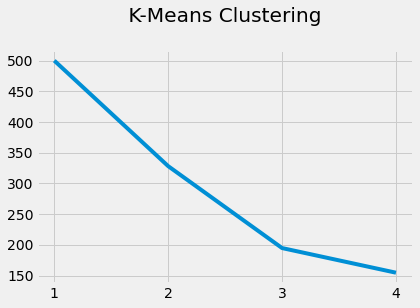

In [67]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 5), kmeans_sse)
 plt.xticks(range(1, 5))
 plt.title(' K-Means Clustering \n')
 plt.show()

# Hierarchical clustering

In [40]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt

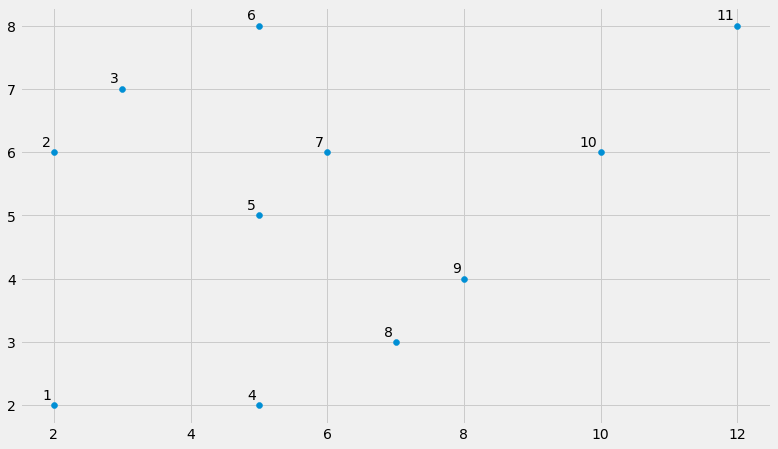

In [70]:
# Initializing the data
X = np.array([
	      [2,2],
	      [2,6],
	      [3,7],
	      [5,2],
	      [5,5],
	      [5,8],
	      [6,6],
	      [7,3],
	      [8,4],
	      [10,6],
	      [12,8],])
labels = range(1, 15)
plt.figure(figsize=(12, 10)) 
plt.subplots_adjust(bottom=0.3) 
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]): plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

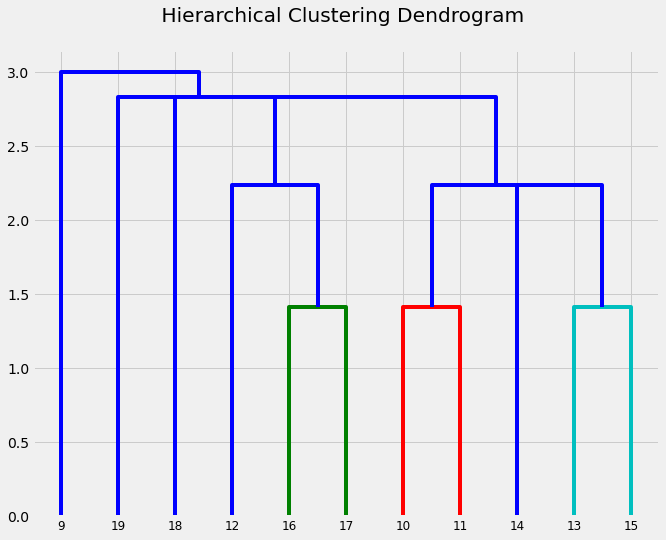

In [66]:
# Applying the clustering technique
plt.figure(figsize=(10, 8))
plt.title(' Hierarchical Clustering Dendrogram  \n')
linked = linkage(X, 'single')
labelList = range(1, 20)
# Displaying the data in the form of dendogram after clustering
dendrogram(linked,
           orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# DB Scan clustering

In [44]:
# Importing the libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [45]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def DBscan(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-52,52),math.sin(2*math.pi/n*x)*r+np.random.normal(-52,52)) for x in range(1,n+1)]

In [55]:
# Creating data points in the form of a circle
dbscan_data=pd.DataFrame(DBscan(500,1000))
dbscan_data=dbscan_data.append(DBscan(300,700))
dbscan_data=dbscan_data.append(DBscan(100,300))

# Adding noise to the dataset
dbscan_data=dbscan_data.append([(np.random.randint(-400,400),np.random.randint(-400,400)) for i in range(300)])

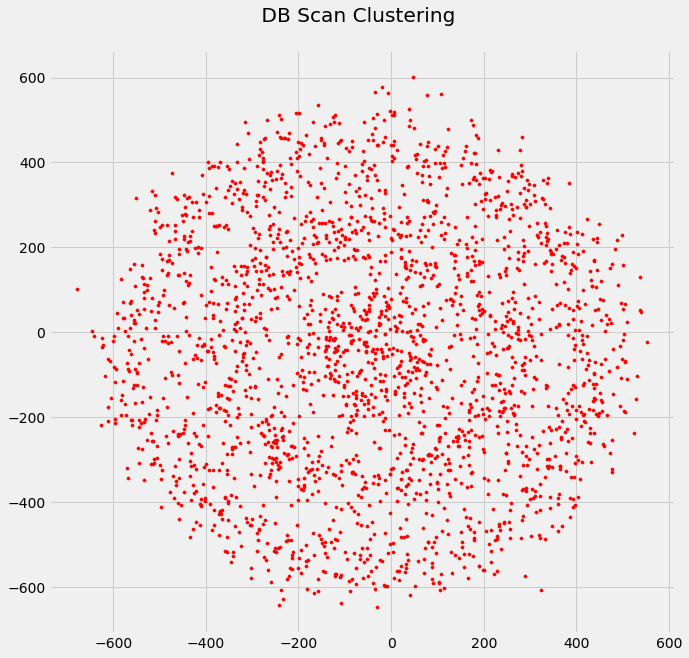

In [68]:
# Displaying the data in a scatter plot
plt.figure(figsize=(10,10))
plt.scatter(dbscan_data[0],dbscan_data[1],s=10,color='red')
plt.title(' DB Scan Clustering  \n')
plt.show()

# Gaussian mixture models clustering

In [61]:
# Import libraries and initialize the data
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import mixture
digits = load_digits()
digits.data.shape

(1797, 64)

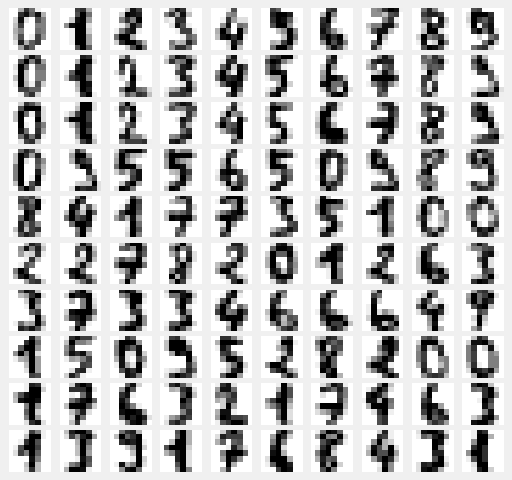

In [62]:
def gaussian_digits(data):
    figure, gaussian_data = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    figure.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(gaussian_data.flat):
        result = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        result.set_clim(0, 16)
plot_digits(digits.data)

In [63]:
# Transforming the data
pca_data = PCA(0.99, whiten=True)
data = pca_data.fit_transform(digits.data)
data.shape

(1797, 41)

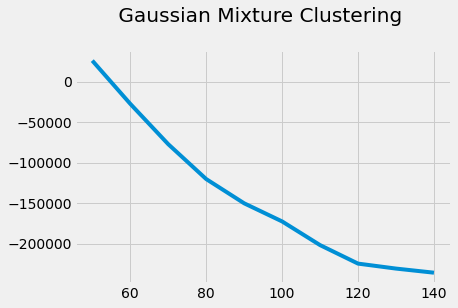

In [69]:
# Applying the Gaussian mixture clustering
n_components = np.arange(50, 150, 10)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
gaussian_result = [model.fit(data).aic(data) for model in models]
plt.title(' Gaussian Mixture Clustering  \n')
plt.plot(n_components, gaussian_result);

In [65]:
gaussian_value = mixture.GaussianMixture(110, covariance_type='full', random_state=0)
gaussian_value.fit(data)
print(gaussian_value.converged_)

True
